

<center><table>
<tr>

<th> <img src= "INL1.png",align="middle",style="width: 10000px;"/> </th>
</tr>
<tr>
<th> <img src="PennNucDataCenter.jpeg"  ,align="middle", style="width: 500px;"/> </th>
</tr>
<center><table>

# <center>Nuclear-Powered Data Centers Economic Optimization Strategy</center>

#### Expected Outcome
- A journal paper evaluating <u>the economic threshold points</u> identifying the conditions under which user requirements would be better suited by a large, small, or micro-reactor. The use case will be focused on data centers and will provide INL with the credential to stake a claim as a leader in nuclear for data center research.

- With a framework on hand, the lab could then leverage its expertise to offer advisory support for the various data centers considering nuclear energy. Further, with interest growing in this area, it is possible that DOE-NE would sponsor research on coupling nuclear reactors with data centers. INL would be well positioned to lead such R&D activities.

#### Activity
- A framework is proposed to evaluate the **economic tradeoff** between large, small, and micro-reactors. 
- The intent is to map out ‘threshold values’ under a given set of requirements 
  - energy demand size
  - reliability 
  
- The framework would parametrize a set of important economic variables to quantifiably differentiate the different reactor classes. 
  - nuclear capacity
  - diseconomies of scale, 
   - economies of mass production, 
   - speed of deployment, 
   - downtime intervals  



### Required Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src import *


20297.3421381159
5


Lets start with the cost and LR

In [2]:

# There is uncertainty about the cost of Vogtle but if we use the ref from the ANS website:
# https://www.ans.org/news/article-3949/vogtle-project-update-cost-likely-to-top-30-billion/
# the total cost is 30.34 billions
# vog_project_cost_tot = 30.34 * 1000000000 # both unit 3 and unit 3

# vogtle3_power = 1117 #MWe from the Georgia power company application to adjust rates.
# vogtle4_power = 1117 #MWe

# divide by vog3 and vog 4 because this is the total cost of both
# large_cost_per_kw = (vog_project_cost_tot /(vogtle3_power+ vogtle4_power ))/1000

# large_cost_should_be_tot =0.5*(8.3+9.2) * 1000000000  #the median LPSR total installed cost range was $8.3–9.2B: https://www.sciencedirect.com/science/article/pii/S0029549323001541

# divide by vog3 only because this is the cost of one reactor only
# large_cost_should_be_per_kw = (large_cost_should_be_tot /(vogtle3_power ))/1000

# print("The Vogtle cost (2023 USD/kW) is : ", int(large_cost_per_kw ) )
# print("The Vogtle (should be) cost (2023 USD/kW) is : ", int(large_cost_should_be_per_kw ) )






large_reactor_ref_power = 1000 # This is the average power in the GAIN metanalaysis report (and i rouneded it)

# learning rates
# These are the reasonable min and max values (for plotting and calculating but not the expected ones) 
lr_min = 0
lr_max = 0.17

# These are the learning rates for the small reactors
# For the learning rate, Using the GAIN meta study
# https://inldigitallibrary.inl.gov/sites/sti/sti/Sort_107010.pdf
large_lr_avg = 0.08 # AVG L 8% Learning rate
large_lr_std = 0.03 # std = 0.03
large_lr_lo = large_lr_avg - large_lr_std
large_lr_hi = large_lr_avg + large_lr_std

# for smaller reactors
small_lr_avg = 0.095 # AVG L 8% Learning rate
small_lr_std = large_lr_std # std = 0.03
small_lr_lo = small_lr_avg - small_lr_std
small_lr_hi = small_lr_avg + small_lr_avg


# power list to consider
pwr_list = [500, 300, 200, 100  ,50, 20, 5, 1]

# $ \textnormal {Economies of Scale Penalty Crossover Point} = f(Learning Rate, Power)$

Demand (MW) =  500
power (MW) =  500
power (MW) =  300
power (MW) =  200
power (MW) =  100
power (MW) =  50
power (MW) =  20
power (MW) =  5
power (MW) =  1


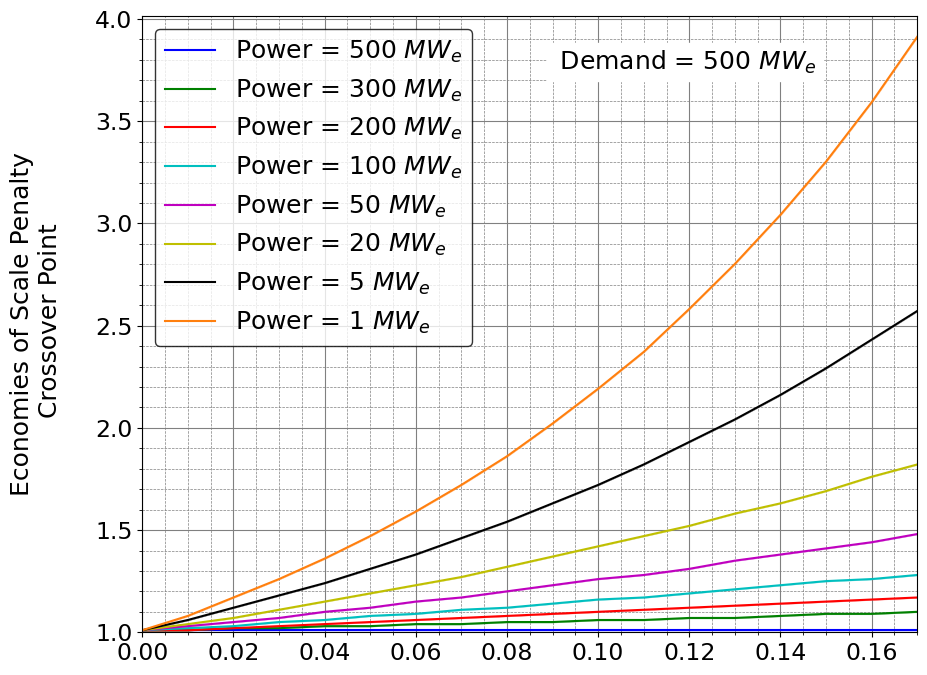

Demand (MW) =  1000
power (MW) =  500
power (MW) =  300
power (MW) =  200
power (MW) =  100
power (MW) =  50
power (MW) =  20
power (MW) =  5
power (MW) =  1


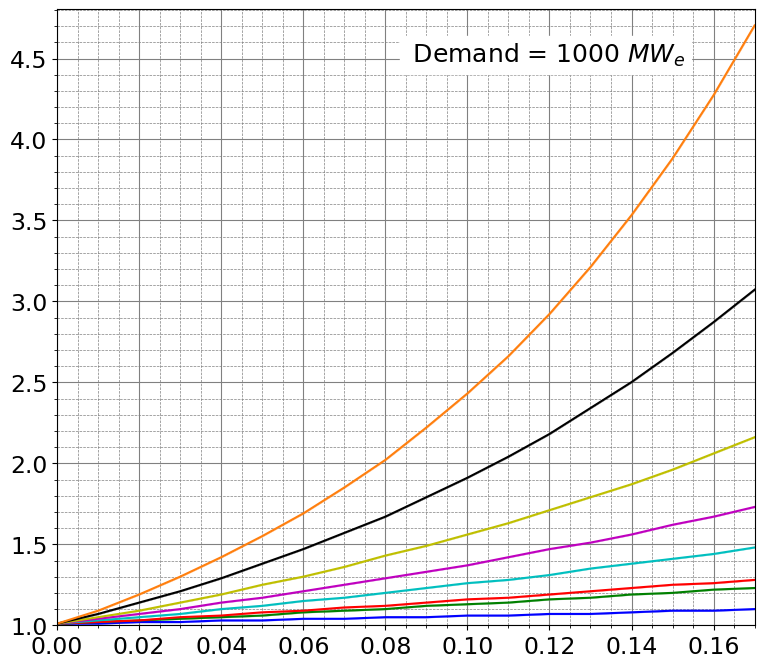

Demand (MW) =  3000
power (MW) =  500
power (MW) =  300
power (MW) =  200
power (MW) =  100
power (MW) =  50
power (MW) =  20
power (MW) =  5
power (MW) =  1


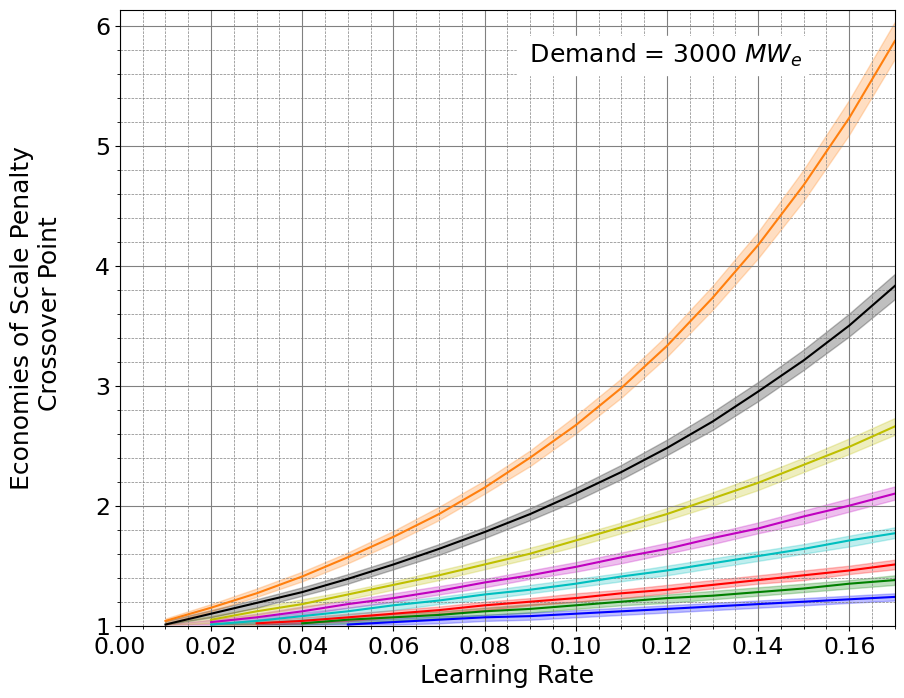

Demand (MW) =  6000
power (MW) =  500
power (MW) =  300
power (MW) =  200
power (MW) =  100
power (MW) =  50
power (MW) =  20
power (MW) =  5
power (MW) =  1


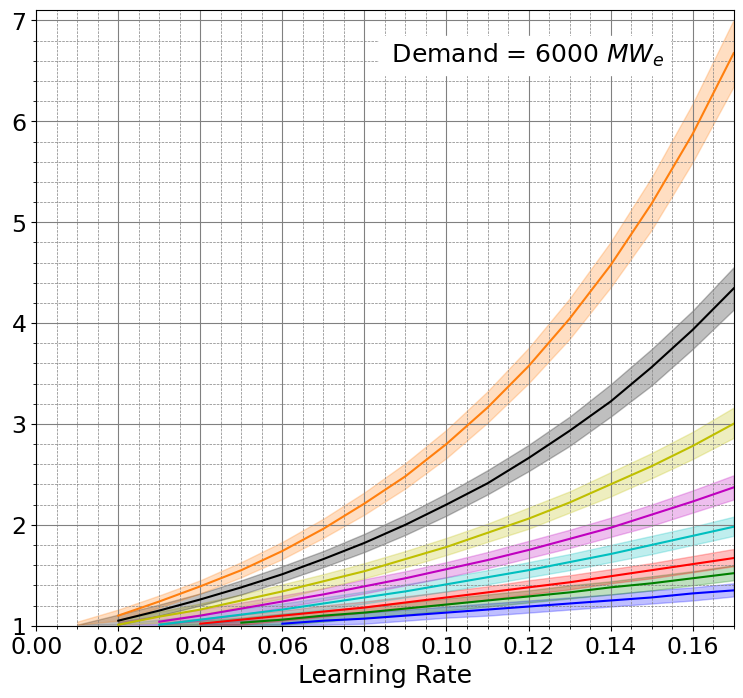

In [3]:
for demand in [500, 1000, 3000, 6000]:
    print("Demand (MW) = ", demand)    
    
    if demand == 500 or demand == 3000:
        fig = plt.figure(figsize=(10, 8))
    else: 
        fig = plt.figure(figsize=(9, 8))  

    lr_interval = 0.01
    ref_large_reactor_cost_per_kw = 1 # the cost here does not matter because we calculate ratios
    min_cost_small = ref_large_reactor_cost_per_kw
    max_cost_small = 10 *min_cost_small 
    num_cost = 900

    num_LR_small = 1+int(np.ceil( (lr_max - lr_min )/ lr_interval) )

    for power in pwr_list:
        print("power (MW) = ", power)
        
        lr_small_list = []
        lr_small_list1 = []
        breakeven_points_0_list = []
        breakeven_points_1_list = []
        avg_point_list = []
        for lr_small in np.linspace(lr_min,lr_max ,num_LR_small) :
            num_large_reactors = int(np.ceil(demand/large_reactor_ref_power))
            num_small_reactors =  int(np.ceil(demand/power))
            try:
                breakeven_points = calculate_break_even_cost_for_lr(lr_small, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw,\
                                        num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost)
                lr_small_list.append(lr_small)
                breakeven_points_0_list.append(breakeven_points[0])
                breakeven_points_1_list.append(breakeven_points[1])
            except:
                ...

            try:
                # For the 8% avg LR for the large reactor
                avg_point = calculate_break_even_cost_for_lr(lr_small, large_lr_avg , large_lr_avg , ref_large_reactor_cost_per_kw,\
                                        num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost)
                avg_point_list.append(avg_point[0])
                lr_small_list1.append(lr_small)
            except:
                ...
                
        plt.fill_between(lr_small_list, breakeven_points_0_list , breakeven_points_1_list, color = color_of(power),alpha=0.25)  
        plt.plot(lr_small_list1, avg_point_list, color = color_of(power) ,label = f"Power = {int(power)} $MW_e$")     

    if demand == 500:
        plt.legend( loc='upper left', fontsize=18, edgecolor='black', fancybox=True)   # bbox_to_anchor=(1.05, 1.0)

    plt.grid(which='major', color='grey', linewidth=0.8)
    plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
    plt.minorticks_on()
    if demand == 6000 or demand == 3000:
        plt.xlabel('Learning Rate', fontsize=18) 
    if demand == 500 or demand == 3000:
        plt.ylabel('Economies of Scale Penalty\n Crossover Point\n', fontsize=18)  

    plt.ylim(1, max(breakeven_points_1_list)+0.1 )
    plt.xlim(0, lr_max ) 
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)

    plt.title(f' Demand = {demand } $MW_e $', fontsize=18,  x=0.7, y=0.9, backgroundcolor='white') 
    plt.savefig(f'lr_vs_costTipping_{demand}.png', bbox_inches='tight')

    plt.show()     

# $ \textnormal {Economies of Scale Penalty Crossover Point} = f(Demand, Power)$
## Learning rate is reflected in the uncertainty

Power (MW) =  500
Power (MW) =  300
Power (MW) =  200
Power (MW) =  100
Power (MW) =  50
Power (MW) =  20
Power (MW) =  5
Power (MW) =  1


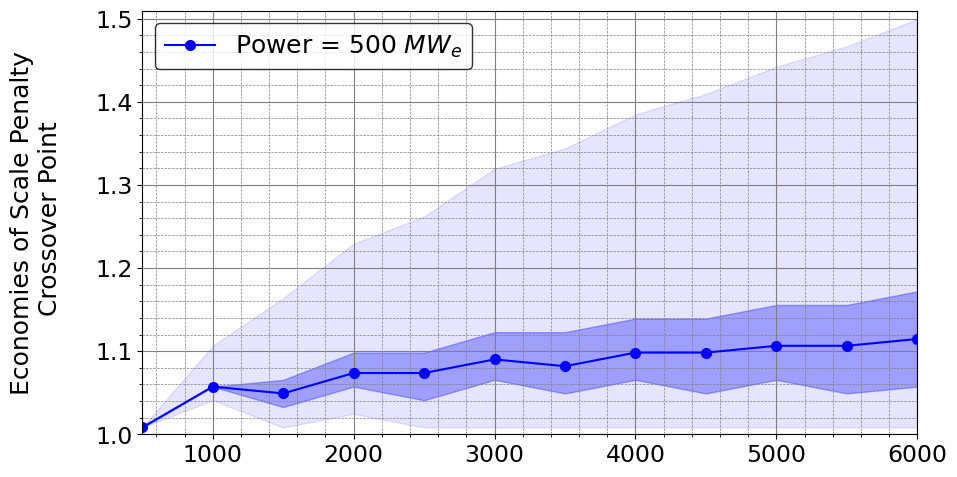

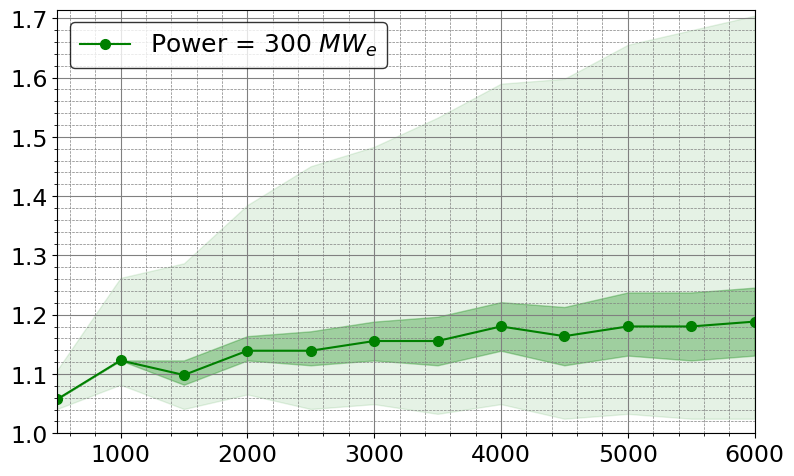

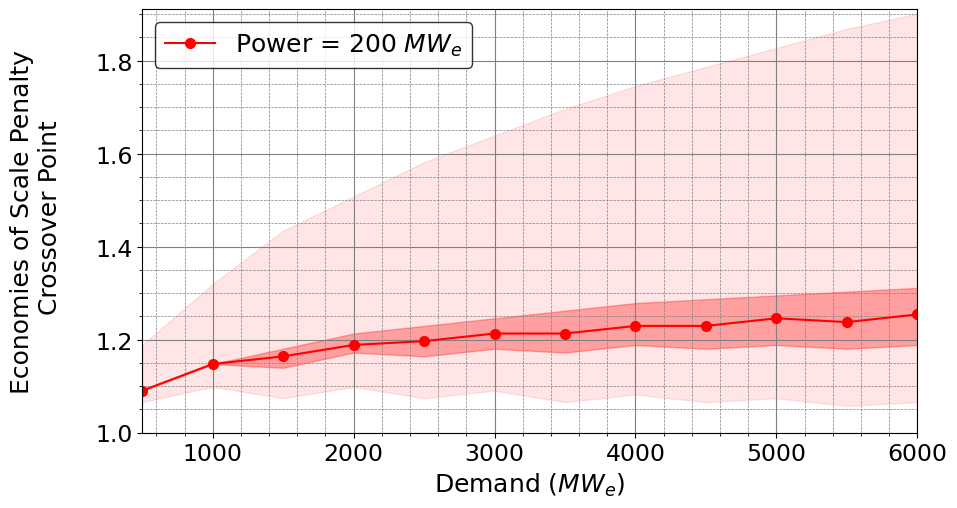

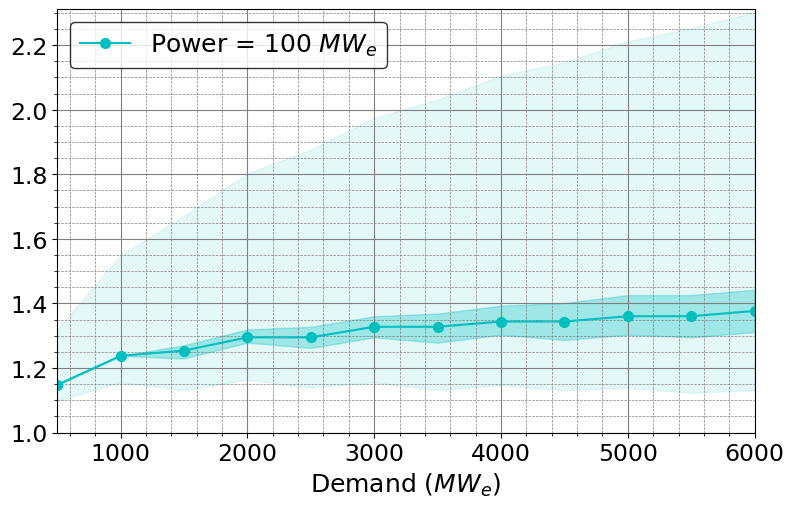

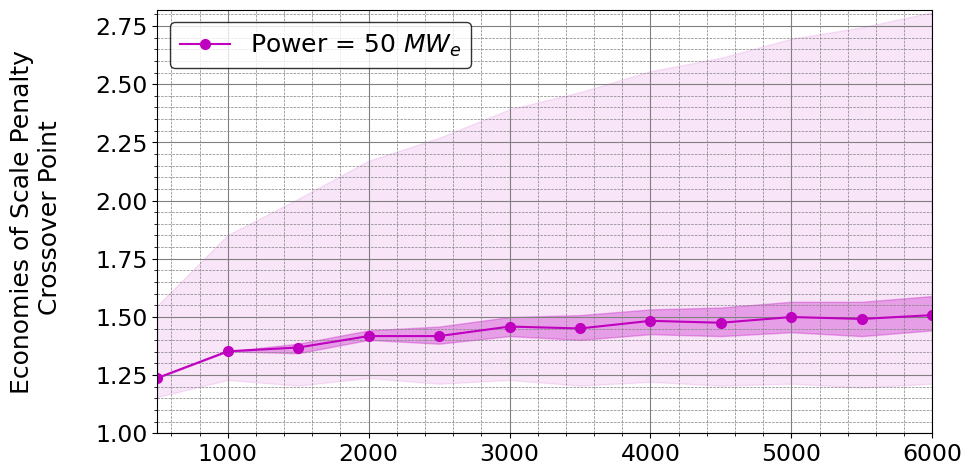

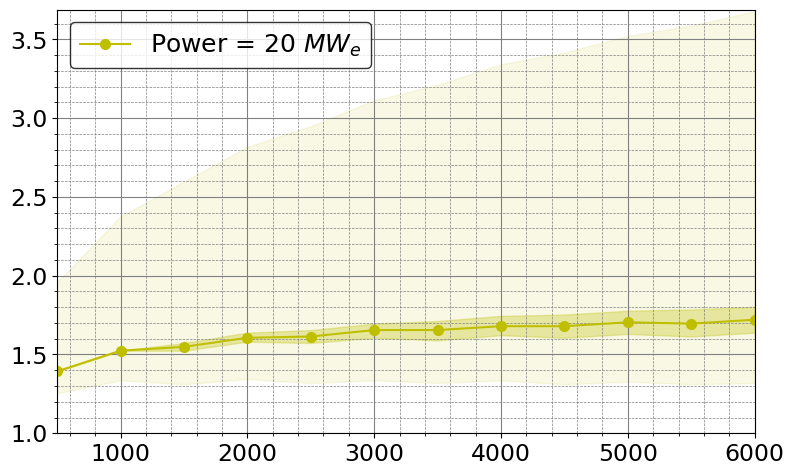

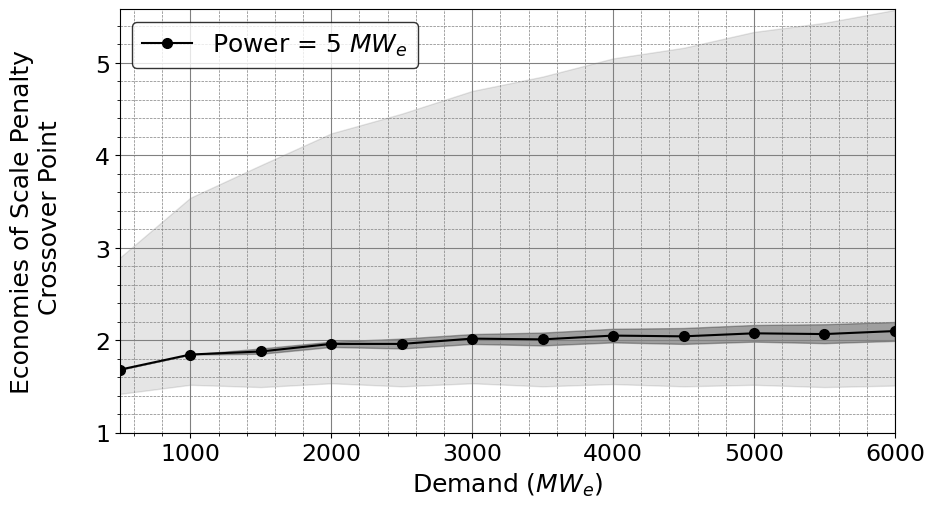

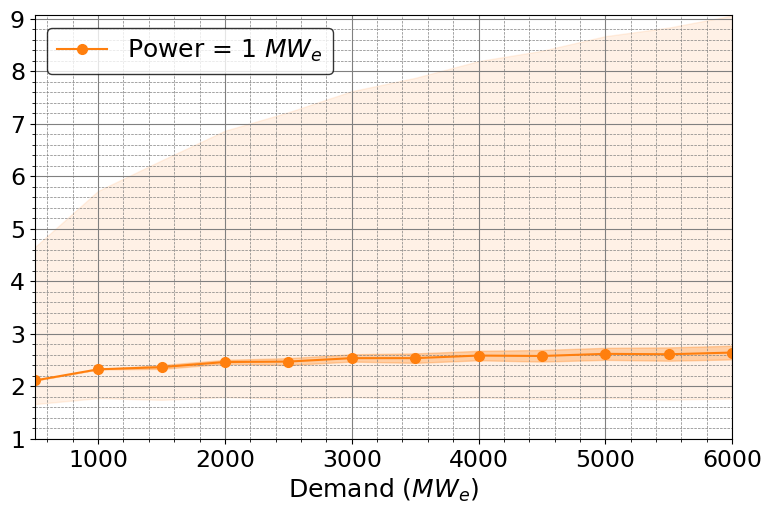

In [4]:
min_cost_small = ref_large_reactor_cost_per_kw
max_cost_small = 10*ref_large_reactor_cost_per_kw
num_cost = 1100
LR_interval =  0.01

for power  in pwr_list:
    if power in [500, 200, 50, 5]:
        fig = plt.figure(figsize=(10, 5.5))
    else:   
        fig = plt.figure(figsize=(9, 5.5)) 
    print("Power (MW) = ",power)

    breakeven_point_0_list = []
    breakeven_point_1_list = []
    demand_list = []
    avg_cost_tipping_list = []
    cost_tipping_1_low_list = []
    cost_tipping_1_hi_list = []
    cost_tipping_2_lo_list = []
    cost_tipping_3_hi_list = []
        
    for demand in   np.linspace(500, 6000, 12):
        
         
        demand_list.append( demand)
        
        num_large_reactors = int(np.ceil(demand/large_reactor_ref_power))
        num_small_reactors =  int(np.ceil(demand/power))
    
        # This is based on avg lr for small reactor and also average LR for large reactor
        avg_cost_tipping = (calculate_break_even_cost_for_lr(small_lr_avg, large_lr_avg, large_lr_avg, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))[0]
        avg_cost_tipping_list.append(avg_cost_tipping)
    
        # lets add the uncertainty because of the learning rate of the large reactors
        cost_tipping_1 = (calculate_break_even_cost_for_lr(small_lr_avg, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))
        cost_tipping_1_low_list.append(cost_tipping_1[0])
        cost_tipping_1_hi_list.append(cost_tipping_1[1])
    
        # if the LR of the small reactor is low
        cost_tipping_2 = (calculate_break_even_cost_for_lr(small_lr_lo, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))
        # we take the lower bound here (because this is lowest ever)
        cost_tipping_2_lo_list.append(min(cost_tipping_2))
        
        # if the LR of the small reactor is high
        cost_tipping_3 = (calculate_break_even_cost_for_lr(small_lr_hi, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))
        # we take the upper bound here (because this is highest ever)
        cost_tipping_3_hi_list.append(max(cost_tipping_3))
       
    plt.fill_between(demand_list, cost_tipping_2_lo_list, cost_tipping_3_hi_list, alpha=0.1, color =  color_of(power))
    plt.fill_between(demand_list, cost_tipping_1_low_list, cost_tipping_1_hi_list, alpha=0.3, color =  color_of(power)) 
    
    #     avg_tipping_cost = [np.average(i) for i in zip(breakeven_point_0_list,  breakeven_point_1_list)]  
    plt.plot(demand_list, avg_cost_tipping_list  , '-o' , markersize = 7 , label = f"Power = {int(power)} $MW_e$", color =  color_of(power)) 
    plt.legend( loc='upper left', fontsize=18, edgecolor='black', fancybox=True)   # bbox_to_anchor=(1.05, 1.0)
    
    
    plt.grid(which='major', color='grey', linewidth=0.8)
    plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
    plt.minorticks_on()
    if power in [200, 100, 5, 1]:
        plt.xlabel('Demand ($MW_e$)', fontsize=18) 
    if power in [500, 200, 50, 5]:
        plt.ylabel('Economies of Scale Penalty\n Crossover Point\n', fontsize=18)  
    
    plt.ylim(1,max(cost_tipping_3_hi_list)+0.01 )
    plt.xlim(demand_list[0], demand_list[-1])
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
    
    plt.savefig(f'demand_vs_CostTipping_{power}.png')

# $ \textnormal {Economies of Scale Penalty Crossover Point} = f(Demand, Power)$ : (power on the x-axis)
## Learning rate is reflected in the uncertainty

Demand = 500 MW
Demand = 1000 MW
Demand = 3000 MW
Demand = 6000 MW


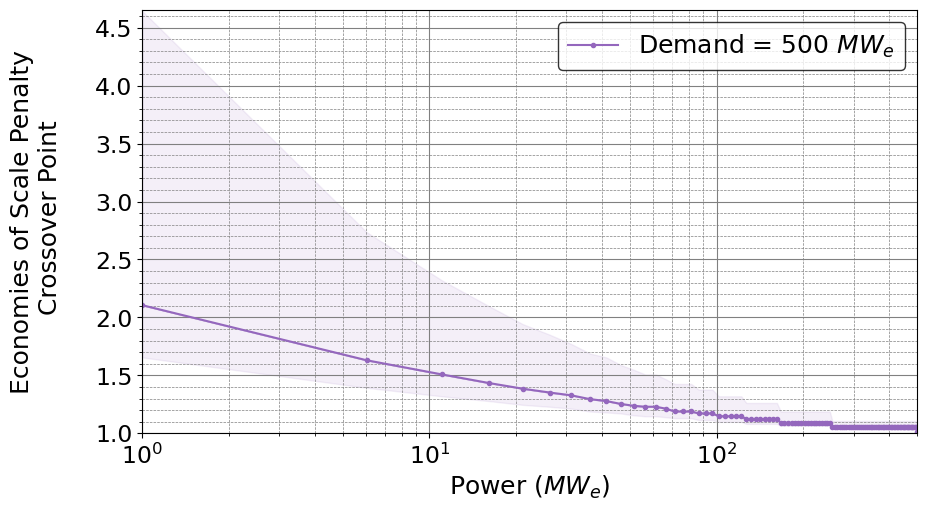

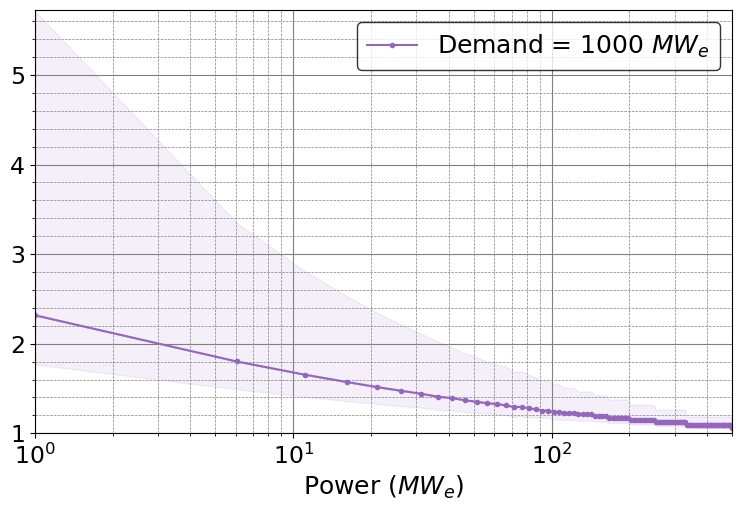

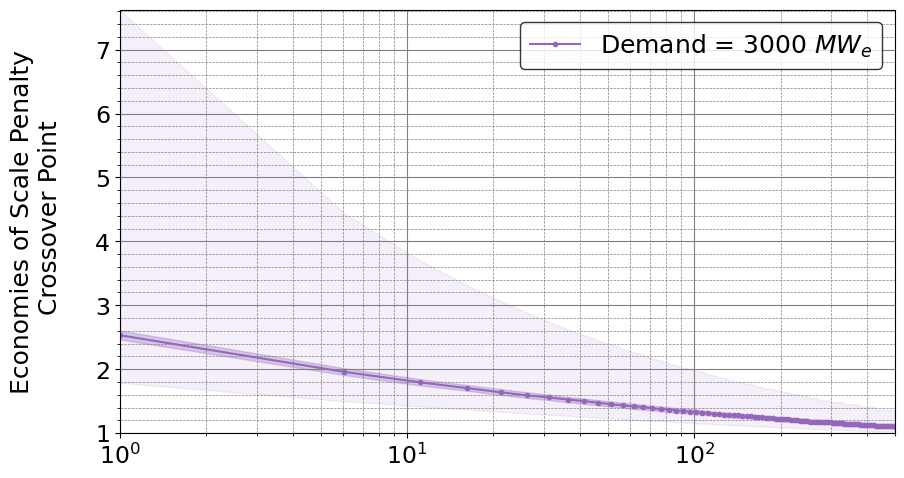

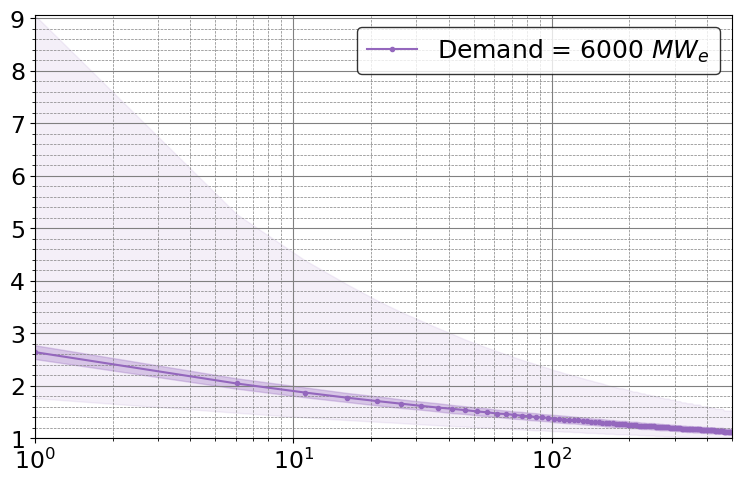

In [5]:
ref_large_reactor_cost_per_kw = 1 # the cost here does not matter because we calculate ratios

min_cost_small = ref_large_reactor_cost_per_kw
max_cost_small = 10*ref_large_reactor_cost_per_kw
num_cost = 1100
LR_interval =  0.01


power_values = np.linspace(1, 500,  100)
for demand in [500, 1000, 3000, 6000]:
    print(f'Demand = {demand} MW')
    if demand in [500, 3000]:
        fig = plt.figure(figsize=(10, 5.5))
    else: 
        fig = plt.figure(figsize=(9, 5.5))  
    
    avg_cost_tipping_list = []
    cost_tipping_1_low_list =[]
    cost_tipping_1_hi_list = []
    cost_tipping_2_lo_list = []
    cost_tipping_3_hi_list = []
    
    for power in power_values:
        
    
        num_large_reactors = int(np.ceil(demand/large_reactor_ref_power))
        num_small_reactors =  int(np.ceil(demand/power))
    
    
    
     # This is based on avg lr for small reactor and also average LR for large reactor
        avg_cost_tipping = (calculate_break_even_cost_for_lr(small_lr_avg, large_lr_avg, large_lr_avg, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))[0]
        avg_cost_tipping_list.append(avg_cost_tipping)
    
        # lets add the uncertainty because of the learning rate of the large reactors
        cost_tipping_1 = (calculate_break_even_cost_for_lr(small_lr_avg, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))
        cost_tipping_1_low_list.append(cost_tipping_1[0])
        cost_tipping_1_hi_list.append(cost_tipping_1[1])
    
        # if the LR of the small reactor is low
        cost_tipping_2 = (calculate_break_even_cost_for_lr(small_lr_lo, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))
        # we take the lower bound here (because this is lowest ever)
        cost_tipping_2_lo_list.append(min(cost_tipping_2))
        
        # if the LR of the small reactor is high
        cost_tipping_3 = (calculate_break_even_cost_for_lr(small_lr_hi, large_lr_lo, large_lr_hi, ref_large_reactor_cost_per_kw ,\
                                     num_large_reactors,  num_small_reactors, min_cost_small, max_cost_small, num_cost))
        # we take the upper bound here (because this is highest ever)
        cost_tipping_3_hi_list.append(max(cost_tipping_3))
    


    plt.fill_between(power_values, cost_tipping_2_lo_list, cost_tipping_3_hi_list, alpha=0.1, color =  'tab:purple')
    plt.fill_between(power_values, cost_tipping_1_low_list, cost_tipping_1_hi_list, alpha=0.3, color =  'tab:purple') 
    
    #     avg_tipping_cost = [np.average(i) for i in zip(breakeven_point_0_list,  breakeven_point_1_list)]  
    plt.plot(power_values, avg_cost_tipping_list  , '-o' , markersize = 3 , label = f"Demand = {demand} $MW_e$", color =  'tab:purple' ) 
    plt.xscale('log')
    # plt.xscale.set_major_formatter(matplotlib.ticker.ScalarFormatter())

    
    plt.legend( loc='upper right', fontsize=18, edgecolor='black', fancybox=True)   # bbox_to_anchor=(1.05, 1.0)
    
    
    plt.grid(which='major', color='grey', linewidth=0.8)
    plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
    plt.minorticks_on()
    if demand in [500, 1000]:
        plt.xlabel('Power ($MW_e$)', fontsize=18) 
    if demand in [500, 3000]:
        plt.ylabel('Economies of Scale Penalty\n Crossover Point\n', fontsize=18)  
    
    plt.ylim(1,max(cost_tipping_3_hi_list)+0.01 )
    plt.xlim(power_values[0], power_values[-1])
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
    plt.savefig(f'power_vs_CostTipping_{demand}.png')

In [6]:
# # https://world-nuclear-news.org/Articles/AP1000-remains-attractive-option-for-US-market-say#:~:text=MIT%20estimates%20the%20overnight%20capital,series%2C%20based%20on%202018%20dollars.


# fuel_lifetime_0 = 2*12*30 # days
# refueling_period_0 = 30 # days
# levelization_period_0 = 30*365 # days
# demand_0 = 1500

# overall_capacity_factor_criteria = 0.99
# min_capacity_factor_criteria = 0.9

# # ref large reactor
# cost_large = 4300  # vogtle_should_be_cost $/kWe (CHECK THIS!!!)
# power_large = 1100 # Vogtle unit 3
# LR_Large = 0.061 # from PWR (76% cost ratio for the 20th reactor) ... 8% in the GAIN report

# # small reactor

# lr_small_min = 0
# lr_small_max = 0.2
# lr_small_interval = 0.01

# num_LR_small = 1+abs(int(np.ceil( (lr_small_min - lr_small_max)/ lr_small_interval) ) ) 

# min_cost_small = cost_large 
# max_cost_small = 50*cost_large 
# cost_interval_small = 20 # 50 dollars
# num_cost_small = int(np.ceil(1 + abs(max_cost_small  - min_cost_small )/ cost_interval_small  ) )


# # #Step1 : calculate cost of the large ractor
# num_reactors_needed_large = num_reactors_needed_for_capacity_factor(overall_capacity_factor_criteria, min_capacity_factor_criteria, fuel_lifetime_0, refueling_period_0, power_large, levelization_period_0, demand_0)

# final_cost_large = calculate_final_cost_due_to_learning_rate(cost_large , LR_Large, int(num_reactors_needed_large)  )

# final_cost_per_demand_large = final_cost_large * (num_reactors_needed_large*power_large/demand_0)

# power_list = [300, 100 ,50 ,20, 10, 5, 1]

# # # Step2: calculate cost of small reactor that matches the large reactor
# lr_small_save_tot = []
# tipping_cost_save_tot = []
# for power_small in power_list:
    
#     num_reactors_needed_small = num_reactors_needed_for_capacity_factor(overall_capacity_factor_criteria, min_capacity_factor_criteria, fuel_lifetime_0, refueling_period_0, power_small, levelization_period_0, demand_0)

#     lr_small_save = []
#     tipping_cost_save = []

#     for lr_small in np.linspace(lr_small_min, lr_small_max , num_LR_small ): 
          
        
#         for cost_small in np.linspace(max_cost_small, min_cost_small, num_cost_small):
        
#             final_cost_small = calculate_final_cost_due_to_learning_rate(cost_small , lr_small, int(num_reactors_needed_small)  )
#             final_cost_per_demand_small = final_cost_small* (num_reactors_needed_small*power_small/demand_0)
#             if final_cost_per_demand_small  <=  final_cost_per_demand_large:
#                 cost_tipping_point = final_cost_per_demand_small
#                 tipping_cost_save.append(cost_small)
#                 lr_small_save.append(lr_small)
#                 print(power_small, "MWe", "LR = ", lr_small)  
#                 break
#     lr_small_save_tot.append(lr_small_save)
#     tipping_cost_save_tot.append( tipping_cost_save)

#     # plt.plot(lr_small_save, np.array(tipping_cost_save)/cost_large, '-o' , markersize = 10, label =f'Power = {power_small} MWe')
#     # plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
# # plt.grid(which='major', color='grey', linewidth=0.8)
# # plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
# # plt.minorticks_on()
# # plt.yticks(fontsize=15)
# # plt.xticks(fontsize=15)  

# # plt.xlabel('Learning Rate',  fontsize=16 )
# # plt.ylabel('Small Reactor to Large Reactor \n FOAK Cost (USD/MWe) Ratio \n',  fontsize=14)
# # plt.xlim(0.04, 0.2)
# # plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.02))

# # plt.show()    

In [7]:
# fig = plt.figure(figsize=(16, 10))

# for i in range (len(lr_small_save_tot)):
#     plt.plot(lr_small_save_tot[i], np.array(tipping_cost_save_tot[i])/cost_large ,'-o' , markersize = 10, label =f'Power = {power_list [i]} MWe')
#     plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


# plt.grid(which='major', color='grey', linewidth=0.8)
# plt.grid(which='minor', color='grey', linestyle='dashed', linewidth=0.5)
# plt.minorticks_on()
# plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)  

# plt.xlabel('Learning Rate',  fontsize=16 )
# plt.ylabel('Small Reactor to Large Reactor \n FOAK Cost (USD/ MWe) Ratio \n',  fontsize=14)
# plt.xlim(0, 0.2)
# plt.ylim(1, 15)
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.02))

# plt.title(f"Cost Tipping Point: Where the total Cost of an SMR/micro reactor ($/demand in MWe) equals the cost of a large reactor : \n Fuel Lifetime = {np.round(fuel_lifetime_0 /30, 1)} months ,   Refueling Period = {refueling_period_0} days ,\
#      Levelization Period = {np.round(levelization_period_0/365, 1)} years \n Demand  = {demand_0} MWe , Target Capacity Factor (per day) = {min_capacity_factor_criteria} \n"  , fontsize=16)
# plt.show()
